### 代码框9-1 绘制销售收入与广告支出的散点图

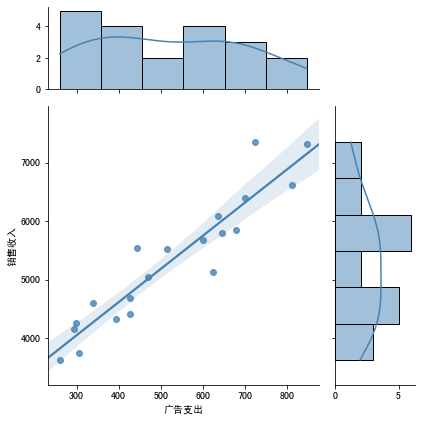

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
example9_1 = pd.read_csv('F:\JupyterData\Statistics_Pythoncoding\data\chap09\example9_1.csv',encoding='gbk')
fig=sns.jointplot(x='广告支出',y='销售收入',data=example9_1, kind='reg', truncate=False, color='steelblue',height=6, ratio=3, marginal_ticks=True)

### 代码框9-2 相关系数的计算和检验

In [4]:
import pandas as pd
from scipy.stats import pearsonr
example9_1 = pd.read_csv('F:\JupyterData\Statistics_Pythoncoding\data\chap09\example9_1.csv',encoding='gbk')
corr, p_value= pearsonr(example9_1['销售收入'],example9_1['广告支出'])
print('二者的相关系数为',round(corr,4),'检验的P值为',round(p_value,4))

二者的相关系数为 0.9371 检验的P值为 0.0


### 代码框9-3 一元线性回归分析

In [5]:
from statsmodels.formula.api import ols
import pandas as pd
example9_1 = pd.read_csv('F:\JupyterData\Statistics_Pythoncoding\data\chap09\example9_1.csv',encoding='gbk')
model= ols('销售收入~广告支出', data=example9_1).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   销售收入   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     129.8
Date:                Tue, 23 Aug 2022   Prob (F-statistic):           1.16e-09
Time:                        14:44:53   Log-Likelihood:                -146.85
No. Observations:                  20   AIC:                             297.7
Df Residuals:                      18   BIC:                             299.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2343.8916    274.483      8.539      0.0

In [6]:
#输出方差分析表
from statsmodels.stats.anova import anova_lm
anova_lm(model,typ=1)

,df,sum_sq,mean_sq,F,PR(>F)
广告支出,1.0,2.013930e+07,2.013930e+07,129.762217,1.161175e-09
Residual,18.0,2.793629e+06,1.552016e+05,NaN,NaN


<ipython-input-11-be9dddc4736f>:9: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s = r'$\hat{y}=2343.89+5.67*$'+ '广告支出', xy = (550,5000), xytext=(600,4000),


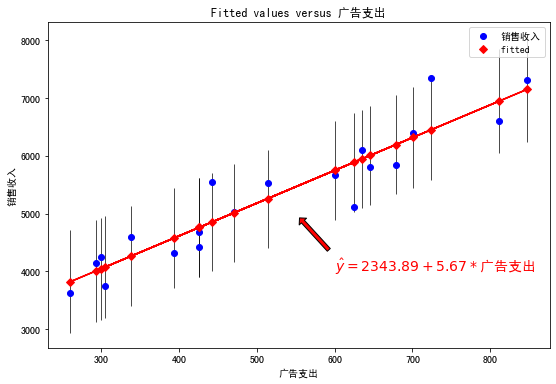

In [11]:
#绘制拟合图
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
fig, ax = plt.subplots(figsize=(9,6))
sm.graphics.plot_fit(model, exog_idx='广告支出',ax=ax)
plt.plot(example9_1['广告支出'],model.fittedvalues,'r')
plt.annotate(s = r'$\hat{y} = 2343.89+5.67*$'+ '广告支出', xy = (550,5000), xytext=(600,4000), 
             arrowprops = {'headwidth':10, 'headlength':5, 'width':4, 'facecolor':'r', 'shrink': 0.1}, 
             fontsize=14, color='red', ha='left') #增加带箭头的注释文本
plt.show()

### 代码框9-4 计算销售收入的执行区间和预测区间

In [12]:
#计算点预测值、置信区间和预测区间
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import summary_table
example9_1 = pd.read_csv('F:\JupyterData\Statistics_Pythoncoding\data\chap09\example9_1.csv',encoding='gbk')
model=ols('销售收入~广告支出', data=example9_1).fit()
conf_level=0.95
st, _,_=summary_table(model, alpha=1-conf_level)
columns = [x+ ''+y for (x,y) in zip(st.data[0], st.data[1])]
df_res=pd.DataFrame()         #将simple table转化为DataFrame
for i in range(len(st.data) - 2):
    df_res = df_res.append(pd.DataFrame(st.data[i+2], index=columns).T)
df_res.reset_index(drop=True, inplace=True)
round(df_res,2)

,Obs,Dep VarPopulation,PredictedValue,Std ErrorMean Predict,Mean ci95% low,Mean ci95% upp,Predict ci95% low,Predict ci95% upp,Residual,Std ErrorResidual,StudentResidual,Cook'sD
0,1.0,4597.5,4264.92,126.89,3998.35,4531.50,3395.38,5134.47,332.58,372.96,0.89,0.05
1,2.0,6611.0,6945.07,168.77,6590.49,7299.64,6044.64,7845.49,-334.07,355.97,-0.94,0.10
2,3.0,7349.3,6448.64,133.55,6168.06,6729.22,5574.70,7322.58,900.66,370.63,2.43,0.38
3,4.0,5525.7,5260.05,88.18,5074.79,5445.31,4411.90,6108.20,265.65,383.96,0.69,0.01
4,5.0,4675.9,4763.05,100.13,4552.70,4973.41,3909.07,5617.04,-87.15,381.02,-0.23,0.00
5,6.0,4418.6,4762.49,100.15,4552.08,4972.89,3908.49,5616.48,-343.89,381.01,-0.90,0.03
6,7.0,5845.4,6196.17,117.80,5948.68,6443.66,5332.29,7060.05,-350.77,375.93,-0.93,0.04
7,8.0,7313.0,7151.01,184.43,6763.53,7538.49,6237.13,8064.90,161.99,348.12,0.47,0.03
8,9.0,5035.4,5015.52,91.69,4822.89,5208.15,4165.73,5865.32,19.88,383.14,0.05,0.00
9,10.0,4322.6,4578.10,108.79,4349.55,4806.65,3719.45,5436.75,-255.50,378.64,-0.67,0.02


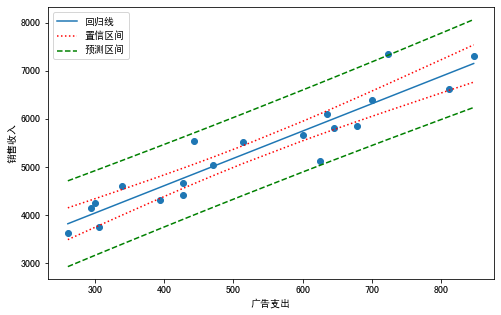

In [33]:
#绘制置信区间和预测区间图
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
df_res['广告支出'] = example9_1['广告支出']
df_plot = df_res.sort_values(by='广告支出')
df_plot.reset_index(drop=True, inplace=True)
#print(df_plot)
plt.figure(figsize=(8,5))
plt.scatter(df_plot['广告支出'], df_plot['Dep VarPopulation'])
p1, = plt.plot(df_plot['广告支出'], df_plot['PredictedValue'])
p2, = plt.plot(df_plot['广告支出'], df_plot['Mean ci95% low'], 'r:')
p3, = plt.plot(df_plot['广告支出'], df_plot['Mean ci95% upp'], 'r:')
p4, = plt.plot(df_plot['广告支出'], df_plot['Predict ci95% low'], 'g--')
p5, = plt.plot(df_plot['广告支出'], df_plot['Predict ci95% upp'], 'g--')
plt.xlabel('广告支出')
plt.ylabel('销售收入')
plt.legend([p1,p3,p5], ['回归线','置信区间','预测区间'])
plt.show()

### 代码框9-5 例9-3的残差和标准化残差

In [35]:
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
example9_1 = pd.read_csv('F:\JupyterData\Statistics_Pythoncoding\data\chap09\example9_1.csv',encoding='gbk')
model = ols('销售收入~广告支出', data=example9_1).fit()
df=pd.DataFrame({'企业编号':example9_1['企业编号'],
               '销售收入':example9_1['销售收入'],
               '点预测值':model.fittedvalues,
               '残差':model.resid,
               '标准化残差':np.array(model.resid_pearson)})
round(df,4)

,企业编号,销售收入,点预测值,残差,标准化残差
0,1,4597.5,4264.9246,332.5754,0.8442
1,2,6611.0,6945.0665,-334.0665,-0.8480
2,3,7349.3,6448.6388,900.6612,2.2862
3,4,5525.7,5260.0493,265.6507,0.6743
4,5,4675.9,4763.0543,-87.1543,-0.2212
5,6,4418.6,4762.4870,-343.8870,-0.8729
6,7,5845.4,6196.1699,-350.7699,-0.8904
7,8,7313.0,7151.0130,161.9870,0.4112
8,9,5035.4,5015.5232,19.8768,0.0505
9,10,4322.6,4578.0996,-255.4996,-0.6485


### 代码框9-6 例9-3的模型诊断

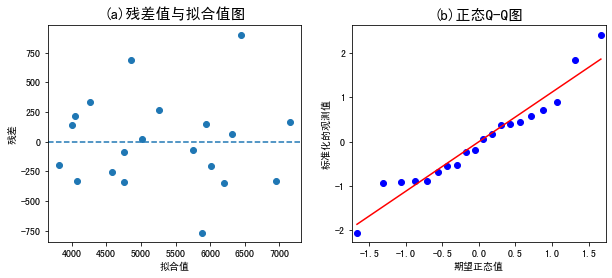

In [36]:
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus']=False
example9_1 = pd.read_csv('F:\JupyterData\Statistics_Pythoncoding\data\chap09\example9_1.csv',encoding='gbk')
model = ols('销售收入~广告支出', data=example9_1).fit()
plt.subplots(1,2,figsize=(10,4))
plt.subplot(121)
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel('拟合值')
plt.ylabel('残差')
plt.title('(a)残差值与拟合值图',fontsize=15)
plt.axhline(0,ls='--')
ax2 = plt.subplot(122)
pplot = sm.ProbPlot(model.resid, fit=True)
pplot.qqplot(line='r', ax=ax2, xlabel='期望正态值', ylabel='标准化的观测值')
ax2.set_title('(b)正态Q-Q图', fontsize=15)
plt.show()